In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assignment 1

## Task 1.1 - Make model

In order to complete the assignment I use the Ls vs. ML file as a starting point.

The code below generates and plots a polynomial based on the parameters.

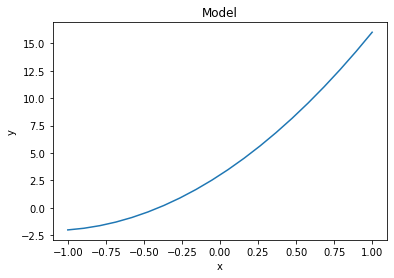

In [55]:
def arbitrary_poly(params):
    poly_model = lambda x: sum([p*(x**i) for i, p in enumerate(params)])
    return poly_model

# params: [theta_0, theta_1, ... , theta_n], where n = model order and theta_0 is bias 
true_params = [3,9,4]
y_model = arbitrary_poly(true_params)

# Plot true model
x = np.linspace(start=-1, stop=1, num=20)
plt.figure()
plt.plot(x, y_model(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model");

## Task 1.2 - Generate noise

The additive noise is supposed to be partially normally distributed and partially Laplacian distributed, depending on the variable alpha. 

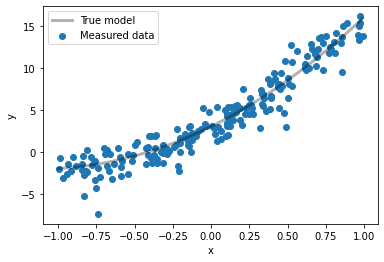

In [24]:
# Hyperparameters for the type of noise-generating distribution.
loc = 0           # location (mean) parameter 
scale = 1         # scaling (std dev) parameter
magnitude = 1.2   # noise magnitude
N = 200          # number of samples

# Generate data points
range_low = -1
range_high = 1
u = np.sort(np.random.uniform(range_low,range_high,N))
y_true = y_model(u)

# Generate noise
from scipy.stats import norm, laplace

laplaceBeta = 1 # Input as the scale parameter in the Laplacian distribution

normVariance = 1 # Input as the scale parameter in the normal distribution

noiseLaplace = magnitude * np.random.laplace(loc, laplaceBeta, N)

noiseGaussian  = magnitude * np.random.normal(loc, normVariance, N)

alfa = 0.5

noiseLaplace = np.random.choice(noiseLaplace, int(N*noiseProbability))

noiseGaussian = np.random.choice(noiseGaussian, int(N*(1-noiseProbability)))
                          
noise = np.concatenate((noiseLaplace, noiseGaussian))
                       
np.random.shuffle(noise)
                       

# Add noise to the generated data points - thus simulating measurement
y = y_true + noise

# Plot measured data
plt.scatter(u, y, label=r"Measured data")
u0 = np.linspace(-1, max(u), N)
plt.plot(u0, y_model(u0), "k", alpha=0.3, lw=3, label="True model")
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

## Task 1.3

Taking inspiration from the LS vs. MLE notebook, the below code calculates the least square approximation of the true model, based on the noise terms.

LS parameters:         ['2.87', '9.18', '3.91']
True model parameters: [3, 9, 4]


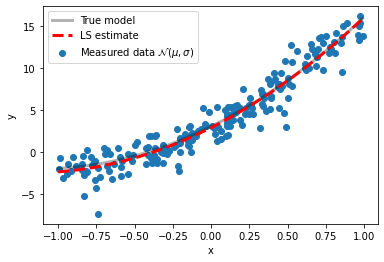

In [25]:
# Matrix form
u_tensor_0 = np.reshape(u,(N,1))

ones_vec = np.ones((N,1))
u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

for i in range(2,len(true_params)):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)

u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product

LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]
print(f"LS parameters:         {LS_params_rounded}")
print(f"True model parameters: {true_params}")

# Recreate model based on LS estimate:
LS_params = LS_params.tolist()
LS_estimate = arbitrary_poly(LS_params)

# Plot true vs. estimated model
plt.scatter(u, y, label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
u0 = np.linspace(-1, max(u), N)
plt.plot(u0, y_model(u0), "k", alpha=0.3, lw=3, label="True model")
plt.plot(u0, LS_estimate(u0), "r--",  lw=3, label="LS estimate")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

Now we calculate the Eclidean distance between LS model and the true model:

In [76]:
d = np.linalg.norm(y_model(u0) - LS_estimate(u0))
print("The Euclidean distance between the true model and the LS model is: {0:.4f}".format(d))

The Euclidean distance between the true model and the LS model is: 2.7579


## Task 1.4

In order to do this task we define a function, based on the above code, that takes alpha, sigma and beta as parameters and returns the Euclidean distance between the true model and the LS model.

In [50]:
def model_error(alpha, sigma, beta):

    # params: [theta_0, theta_1, ... , theta_n], where n = model order and theta_0 is bias 
    true_params = [3,9,4]
    y_model = arbitrary_poly(true_params)

    # Hyperparameters for the type of noise-generating distribution.
    loc = 0           # location (mean) parameter 
    magnitude = 1.2   # noise magnitude
    N = 200          # number of samples

    #np.random.seed(123)  # Non-random generation between code executions. Comment out for true random

    # Generate data points
    range_low = -1
    range_high = 1
    u = np.sort(np.random.uniform(range_low,range_high,N))
    y_true = y_model(u)

    # Generate noise
    from scipy.stats import norm, laplace
    
    noiseLaplace = magnitude * np.random.laplace(loc, beta, N)

    noiseGaussian  = magnitude * np.random.normal(loc, sigma, N)

    noiseLaplace = np.random.choice(noiseLaplace, int(np.ceil(N*(1-alpha))))

    noiseGaussian = np.random.choice(noiseGaussian, int(np.ceil(N*(alpha))))

    noise = np.concatenate((noiseLaplace, noiseGaussian))

    np.random.shuffle(noise)

    # Add noise to the generated data points - thus simulating measurement
    y = y_true + noise[:200]

    # Calculate LS:
    u_tensor_0 = np.reshape(u,(N,1))

    ones_vec = np.ones((N,1))
    u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

    for i in range(2,len(true_params)):
        u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)

    u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
    u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

    u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product

    LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
    LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]

    # Recreate model based on LS estimate:
    LS_params = LS_params.tolist()
    LS_estimate = arbitrary_poly(LS_params)

    d = np.linalg.norm(y_model(u0) - LS_estimate(u0))
    return d

### The plots below shows the 3 different subtasks from task 1.3:

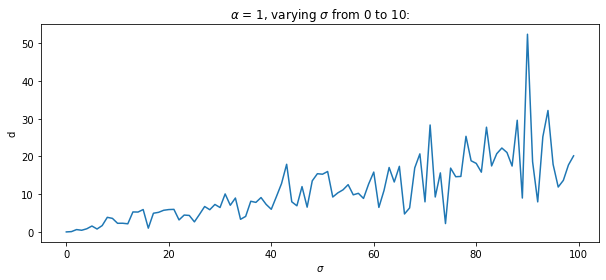

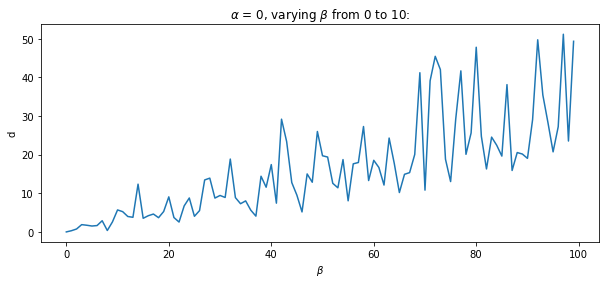

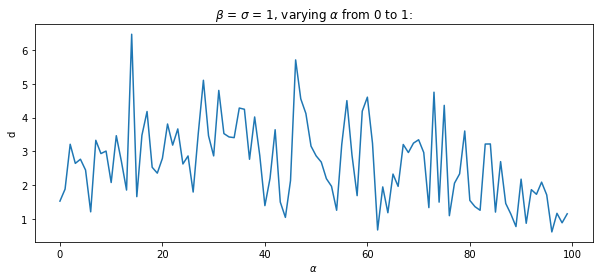

In [85]:

sigma_errs = [model_error(alpha=1, beta=0, sigma=s/10) for s in range(100)]
beta_errs = [model_error(alpha=0, beta=b/10, sigma=0) for b in range(100)]
alpha_errs = [model_error(alpha=a/100, beta=1, sigma=1) for a in range(100)]
 
plt.figure(figsize=(10, 4))
plt.plot(sigma_errs)
plt.title(r"$\alpha$ = 1, varying $\sigma$ from 0 to 10:")
plt.xlabel(r"$\sigma$")
plt.ylabel("d")
plt.show()
 
plt.figure(figsize=(10, 4))
plt.plot(beta_errs)
plt.title(r"$\alpha$ = 0, varying $\beta$ from 0 to 10:")
plt.xlabel(r"$\beta$")
plt.ylabel("d")
plt.show()
 
plt.figure(figsize=(10, 4))
plt.plot(alpha_errs)
plt.title(r"$\beta$ = $\sigma$ = 1, varying $\alpha$ from 0 to 1:")
plt.xlabel(r'$\alpha$')
plt.ylabel("d")
plt.show()

Then we increase the sampling rate and plot the rolling average over $\alpha$/d plot to clarify a trend.

<AxesSubplot:xlabel='$\\alpha$'>

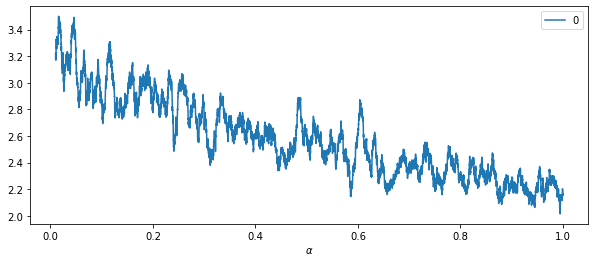

In [88]:
ar = np.array([model_error(alpha=a/10000, beta=1, sigma=1) for a in range(10000)])
ar_df = pd.DataFrame(ar)
ar_df = pd.DataFrame(ar)
ar_df[r"$\alpha$"] = np.linspace(0, 1, 10000)
ar_df.set_index(r"$\alpha$", inplace=True)
ar_df.rolling(100).mean().plot(figsize=(10, 4))

### Comments on the plots:

On the first plot, we observe that the euclidean distance increases more or less linearly as $\sigma$ increases. However the variance also increases, this is because we increase the standard deviation in the normal distribution when increasing $\sigma$.

On the second plot, its basically the same thing happening, the $\beta$ variable increases the standard deviation in the laplace distribution which is something we observe in the euclidian distance as well. 

On the last plot $\alpha$ increments from 0 to 1, here we observe that the euclidean distance decreases when $\alpha$ approaches 1, this might be due to when approaching the standard distribution, values tend to be gathered around the mean as unlike as in the standard deviation. This explains the slight decrease in euclidean distance. 